In [11]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib.pyplot as plt


In [12]:
database = "powerlifting.db"
connection = sql.connect(database)

In [13]:
# Database contains 100k results from powerlifting competitions. 
# Columns include things like: Sex, weight class, weight lifted, equipped/raw
query = """SELECT field1, field2, field4, field8, field19
FROM openpowerlifting"""

In [14]:
df = pd.read_sql_query(query, connection)
df = df.iloc[1:,:]

# Remove the rows that contain "NULL" as a value
df = df[df.field8.notnull()]
df = df[df.field19.notnull()]

# Only look at raw competitions, meaning that no assisting equipped is being used
df = df[df.field4 == "Raw"]

df['field8'] = np.float64(df['field8'])
df['field19'] = np.float64(df['field19'])        

# Only include lifters who got at least one succesful lift. Field19 contains the highest amount of weight lifted of all attempts
# If field19 has a - sign in front of the weight, it means that the lifter failed all attempts
df = df[df.field19 >0]

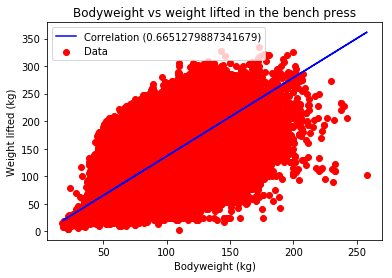

In [16]:
x = df["field8"]
y = df["field19"]

plt.scatter(x, y, color ="red")

plt.xlabel("Bodyweight (kg)")
plt.ylabel("Weight lifted (kg)")
plt.title("Bodyweight vs weight lifted in the bench press")

# Use linear polynomial to fit a correlation line for the data
# m = Steepness, b = value when x = 0 (y axis' intersection point)
m, b = np.polyfit(x, y, 1)
correlation = df['field8'].corr(df['field19'])

plt.plot(x, x*m+b, color = "blue")
plt.legend([f"Correlation ({correlation})", "Data"])
plt.show()